# **CNN Model – To Count Fingers And Distinguish Between Left And Right Hand**

Convolutional Neural Network (CNN) being computationally strong has the ability to automatically detect the important features without the governance of humans. Also compared to normal neural networks accuracy of CNN models are always high and is considered to be one of the strong architectures when it comes to image classification. CNN models are now capable of doing classification better than humans; it has surpassed human ability for classifying an image.

This practice session talks about the Kaggle problem that is about predicting a finger count and also distinguishing between left and right hand. We will build a CNN model to classify the finger count and also distinguish the hand. We will directly import the data from Kaggle and will be using Google Colab for implementing the same so to get benefited from GPU and TPU that are provided by Google Colab. You can make use of Jupyter notebook or any other IDE as well for building the neural network.

## **The Dataset**

In the dataset that we will download from Kaggle, we have 21,600 images of left and right-hand fingers. All the images are 128 by 128 pixels. We have 18,000 images in the training set and 3600 images in the testing set. Labels are in 2 last characters of a file name. L/R indicates left/right hand; 0,1,2,3,4,5 indicates number of fingers.

In [ ]:
!python -m pip install pip --upgrade --user -q --no-warn-script-location
!python -m pip install numpy pandas seaborn matplotlib scipy statsmodels sklearn nltk gensim tensorflow keras torch torchvision \
    tqdm scikit-image pillow face_recognition --user -q --no-warn-script-location


import IPython
IPython.Application.instance().kernel.do_shutdown(True)


## **Code Implementation**

In [2]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
from skimage.io import imread
from skimage.transform import resize 
import matplotlib.pyplot as plt
import random
import warnings
from scipy import ndarray
import skimage as sk
from skimage import transform
import cv2
from skimage import util
from skimage import io
from sklearn import metrics
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.layers import LeakyReLU
from numpy import asarray

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  app.launch_new_instance()


Once you have downloaded the zip file of the data. We now need to unzip the file using the below code. 

In [3]:
# from zipfile import ZipFile
# file_name = "fingers.zip"

# with ZipFile(file_name,'r') as zip:
#   zip.extractall()
#   print('Done')

Done


After we are done unzipping the data file. We will create two lists to store the training image and corresponding training labels. After creating the list we have read the training data and training labels in the respective list using the below code.

In [4]:
X_train=[]
y_train=[]
for i in tqdm(os.listdir('train')):
      img = cv2.imread("train/"+i)   
      img = cv2.resize(img,(128,128))
      X_train.append(img)
      y_train.append(i[-6:-4]) 

Let’s visualize a few of the training images with their respective labels using the code shown below in the image. Use the below code to visualize the 10 training samples with their labels as shown in the image.

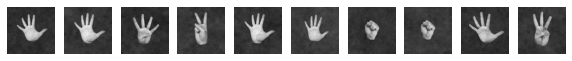

label for each of the above image: ['5R', '5R', '4L', '2R', '5R', '5R', '0L', '0L', '5R', '3L']


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

We again create two other lists to store the testing images and corresponding testing labels. And again we read the images and their label in the respective lists.

In [6]:
X_test = []
y_test = []
for i in tqdm(os.listdir("test")):
      img = cv2.imread("test/"+i)   
      img = cv2.resize(img,(128,128))
      X_test.append(img)
      y_test.append(i[-6:-5]) 

We have then checked the shape of training and testing images that comes out to be 128 * 128 * 3 and checked the total label in y_train and y_test which were 12 each.

After this, we transform the labels using LabelEncoder and then convert them to be categorical having 12 classes and transform them into arrays. You can refer to the below image for the same.

In [7]:
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (128, 128, 3)
Shape of an image in X_test:  (128, 128, 3)


In [8]:
print("Total categories: ", len(np.unique(y_train)))
print("Total categories: ", len(np.unique(y_test)))

Total categories:  12
Total categories:  6


In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=12)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=12)

y_train = np.array(y_train)
X_train = np.array(X_train)

y_test = np.array(y_test)
X_test = np.array(X_test)

Once it is done we have then finally checked the shape of training and testing images and their labels as shown in the below image.

In [10]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (18000, 128, 128, 3)
X_test Shape:  (3600, 128, 128, 3)
y_train Shape:  (18000, 12)
y_test Shape:  (3600, 12)


## **CNN Model for Finger Count Classification**

We have then initiated the model to be sequential and defined batch normalization layer with 4 convolution and 4 maxpool layers with activation function as relu followed by flatten layer and fully connected layer. Last fully connected layer has 12 as output class and activation function as softmax.

In [11]:
m1=Sequential()
m1.add(BatchNormalization(input_shape = (128,128,3)))
m1.add(Convolution2D(32, (3,3), activation ='relu', input_shape = (128, 128, 3))) 
m1.add(MaxPooling2D(pool_size=2))
m1.add(Convolution2D(filters=6,kernel_size=4,padding='same',activation='relu'))
m1.add(MaxPooling2D(pool_size=2))
m1.add(Convolution2D(filters=128,kernel_size=3,padding='same',activation='relu'))
m1.add(MaxPooling2D(pool_size=2))
m1.add(Convolution2D(filters=128,kernel_size=2,padding='same',activation='relu'))
m1.add(MaxPooling2D(pool_size=2))
m1.add(Flatten()) 
m1.add(Dense(units=128,activation = 'relu'))
m1.add(Dense(units = 64, activation = 'relu'))
m1.add(Dense(units = 32, activation = 'relu'))
m1.add(Dense(units = 12, activation = 'softmax'))

After this, we compile the model using adam as an optimizer, loss as categorical cross-entropy and metrics as accuracy as shown below.

In [12]:
m1.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

## **Training the CNN Model**

Once the model is compiled we then fit our training and validation data on the model and start the training process. We have assigned epochs to be 30. The code for the training is shown below in the image. The process iterates upto 30 epochs and 4 things are computed that are training accuracy, loss, validation loss and validation accuracy.

In [13]:
model = m1.fit(X_train,y_train,
                    epochs=30, 
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0)

Epoch 1/5
563/563 [==============================] - 517s 886ms/step - loss: 0.4012 - accuracy: 0.8590 - val_loss: 28.6900 - val_accuracy: 0.0833
Epoch 2/5
563/563 [==============================] - 495s 880ms/step - loss: 2.5229e-05 - accuracy: 1.0000 - val_loss: 32.0724 - val_accuracy: 0.0833
Epoch 3/5
563/563 [==============================] - 503s 894ms/step - loss: 6.9284e-06 - accuracy: 1.0000 - val_loss: 34.2064 - val_accuracy: 0.0833
Epoch 4/5
563/563 [==============================] - 506s 899ms/step - loss: 4.0224e-06 - accuracy: 1.0000 - val_loss: 36.0100 - val_accuracy: 0.0833
Epoch 5/5
563/563 [==============================] - 500s 888ms/step - loss: 2.4944e-06 - accuracy: 1.0000 - val_loss: 37.6816 - val_accuracy: 0.0833


### Obtaining the Accuracy

Once the training has been done we can evaluate the model and compute loss and accuracy using the below code.

In [14]:
loss_and_metrics = m1.evaluate(X_test,y_test)
print(loss_and_metrics)

113/113 [==============================] - 24s 208ms/step - loss: 37.6816 - accuracy: 0.0833
[37.68162155151367, 0.0833333358168602]


## **Predictions on Finger Counting**

We can now use this model to randomly check the prediction and actual label of the few images. Use the below to do the same. We generate a random number to pick an image and then make a prediction of that image using the model. You can compare it with the actual label of the image. For both the randomly selected image the model has predicted correctly.

In [15]:
predicted_classes = m1.predict(X_train[:,:,:,:])
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes[0]

11

In [16]:
import numpy as np
k=X_train.shape[0]
r=np.random.randint(k)
r

8574

In [17]:
print("Prediction:",predicted_classes[r])
print("\nActuals:   ",y_train[r])

Prediction: 4

Actuals:    [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [18]:
k=X_train.shape[0]
r=np.random.randint(k)
r

17037

In [19]:
print("Prediction:",predicted_classes[r])
print("\nActuals:   ",y_train[r])

Prediction: 0

Actuals:    [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


You can always tune the parameters for improving the model performance like epochs and optimizers. Also for better accuracy, you can also use pre-trained architectures like ResNet and VGG16 that are trained on Image Net dataset. 

#**Related Articles:**

> * [CNN Model – To Count Fingers](https://analyticsindiamag.com/how-to-implement-cnn-model-to-count-fingers-and-distinguish-between-left-and-right-hand/)

> * [Emotion Detection](https://analyticsindiamag.com/my-first-cnn-project-emotion-detection-using-convolutional-neural-network-with-tpu/)

> * [Roboflow](https://analyticsindiamag.com/step-by-step-guide-to-object-detection-using-roboflow/)

> * [Capsule Network](https://analyticsindiamag.com/understanding-capsule-net-with-its-implementation-in-computer-vision/)

> * [Face Attendance System](https://analyticsindiamag.com/a-complete-guide-on-building-a-face-attendance-system/)

> * [6 MNIST Image Dataset](https://analyticsindiamag.com/mnist/)

> * [Vision Transformers](https://analyticsindiamag.com/hands-on-vision-transformers-with-pytorch/)